# <center>Модели машинного обучения в production
Важно задать себе следующие вопросы:
* Какими будут основные потребители результатов? Это будут другие сервисы? Или модель будет встроена в мобильное приложение?
* Как и в каком виде потребители ожидают получать результаты? По времени или по запросу? Если по запросу, то по каким правилам они будут его осуществлять?
* Какая для этого существует (или планируется) инфраструктура?

Существует множество методологий для управления Data Science-проектами. Наиболее распространённой методологией разработки является знакомая нам модель *Cross-Industry Standard Process for Data Mining*, или *CRISP-DM*. 

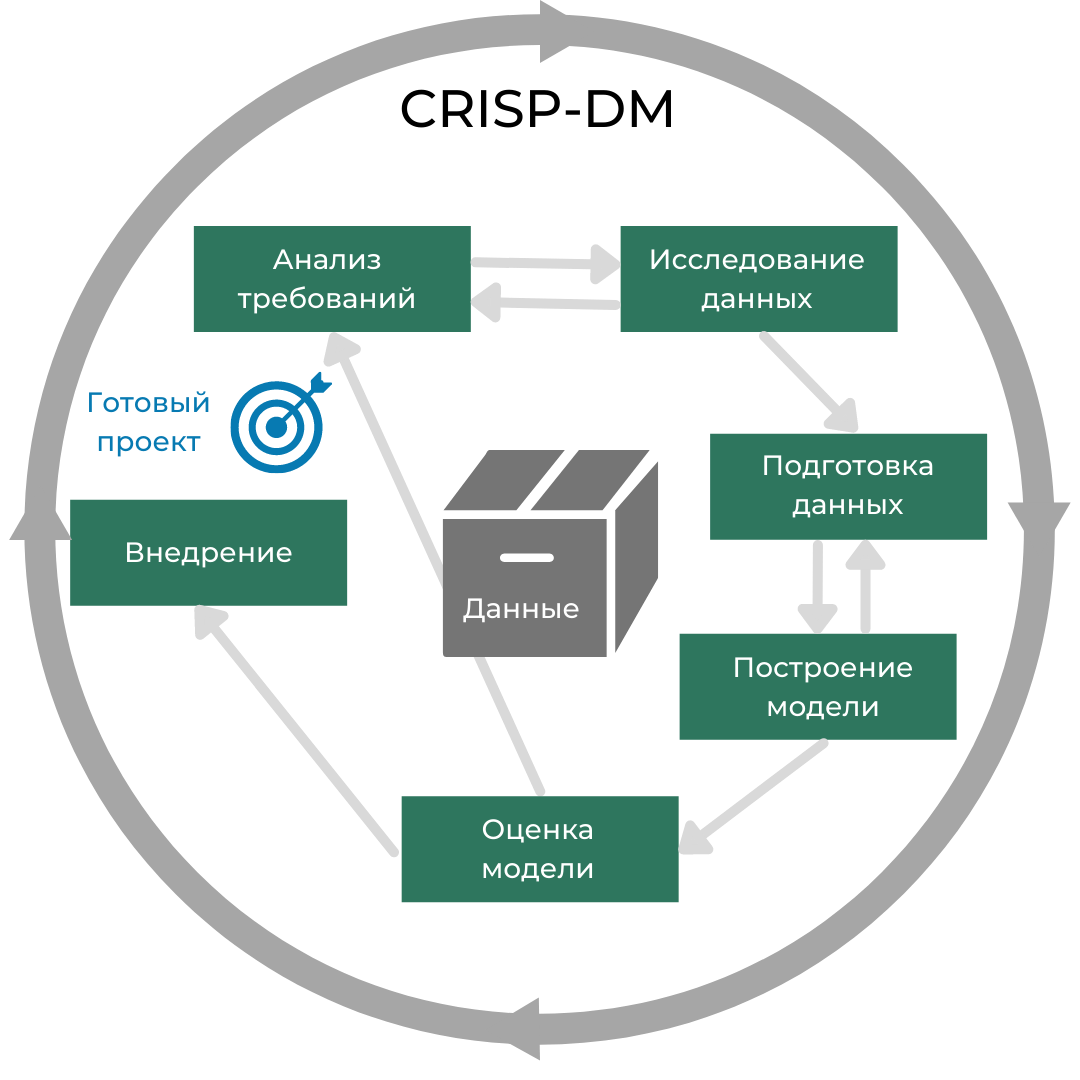

На **этапе внедрения** мы должны понять, будет ли происходить деградация модели во времени в связи с изменением распределений входных данных и возможно ли автоматизировать оценку качества, обновление моделей и их деплой.

# <center>Деплой модели
>Задача развёртывания приложения на сервере называется **деплой** (от англ. *deployment* — внедрение, развёртывание). По сути, это процесс трансформации исходного кода вашего приложения в рабочее состояние на конкретном сервере.

Для того чтобы внедрить модель в продакшн (в минимальном варианте), необходимо:
* Сохранить обученную модель в файл.
* Поднять сервер.
* Доставить и запустить на нём свою модель.

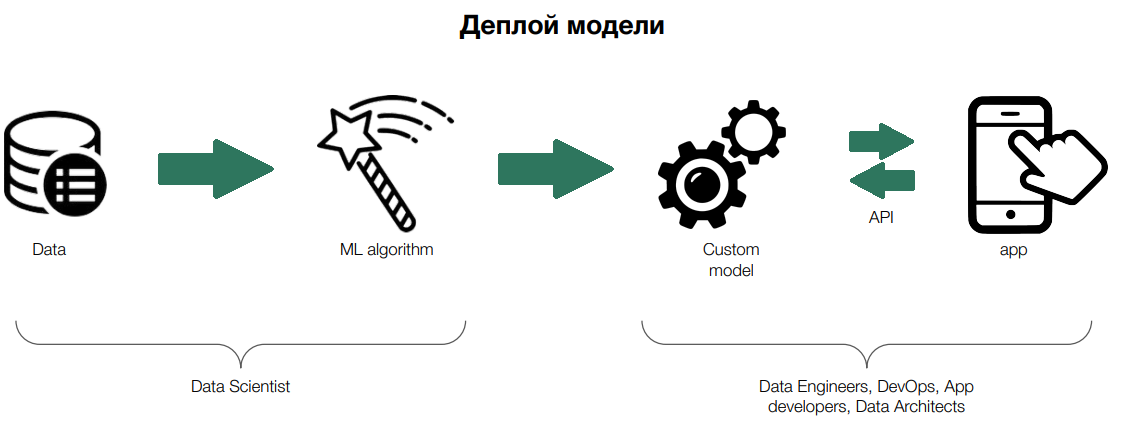

Опыт подсказывает, что если модель создаётся «в вакууме», то в итоге её просто нельзя будет вывести в продакшн.

Дополнительной проблемой является то, что большинство библиотек для машинного обучения сфокусированы именно на **обучении**, а не на **предсказании**.

